# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
from statsmodels.formula.api import ols

from pathlib import Path
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100000)

## Step 1: Read in Data

In [2]:
df_train = pd.read_csv('Data/kc_house_data_train.csv', index_col = 'id').drop(columns='Unnamed: 0')
print(df_train.shape) # Our data set has 17,290 observations and 20 features
df_train.head()

(17290, 20)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

**EDA Steps**

Quickly checking which columns are present in our data set, whether or not any null values exist in these columns, as well as their data type. 

In [3]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 2591820310 to 6703100135
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17290 non-null  object 
 1   price          17290 non-null  float64
 2   bedrooms       17290 non-null  int64  
 3   bathrooms      17290 non-null  float64
 4   sqft_living    17290 non-null  int64  
 5   sqft_lot       17290 non-null  int64  
 6   floors         17290 non-null  float64
 7   waterfront     17290 non-null  int64  
 8   view           17290 non-null  int64  
 9   condition      17290 non-null  int64  
 10  grade          17290 non-null  int64  
 11  sqft_above     17290 non-null  int64  
 12  sqft_basement  17290 non-null  int64  
 13  yr_built       17290 non-null  int64  
 14  yr_renovated   17290 non-null  int64  
 15  zipcode        17290 non-null  int64  
 16  lat            17290 non-null  float64
 17  long           17290 non-null  float

Inspecting the number of unique values associated with each column. 

In [4]:
df_train.nunique(axis=0) 

date              371
price            3534
bedrooms           13
bathrooms          30
sqft_living       947
sqft_lot         8428
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        867
sqft_basement     290
yr_built          116
yr_renovated       69
zipcode            70
lat              4837
long              733
sqft_living15     714
sqft_lot15       7582
dtype: int64

Generating a statistical summary for each of our existing features.

In [5]:
df_train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


Creating the variable 'df_train_corr' to understand the strength of the relationship between each of our features. 

In [89]:
df_train_corr = df_train.corr()

Visualizing the strength of the relationships between each of these features. 

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_train_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks

# title
title = 'Kings County, WA: Housing Features Correlation Matrix'

plt.title(title, loc='left', fontsize=20)
plt.show()

**Key Observations**

Utilizing this chart, I was able to quickly understand which of the features from our data set have the greatest and least significant impact on home prices.


**Top 5 Features Relating to Home Price:**
1. Grade: 0.87
2. Sqft_Living: 0.70
3. Sqft_Above: 0.61
4. Sqft_Living15: 0.59
5. Bathroom: 0.52

**Bottom 5 Features Relating to Home Price:**
1. Zip Code: -0.05
2. Longitude: 0.02
3. Condition: 0.04
4. Year Built: 0.06
5. Sqft_Lot15: 0.08

**Visualizing the Average Home Price by Grade**

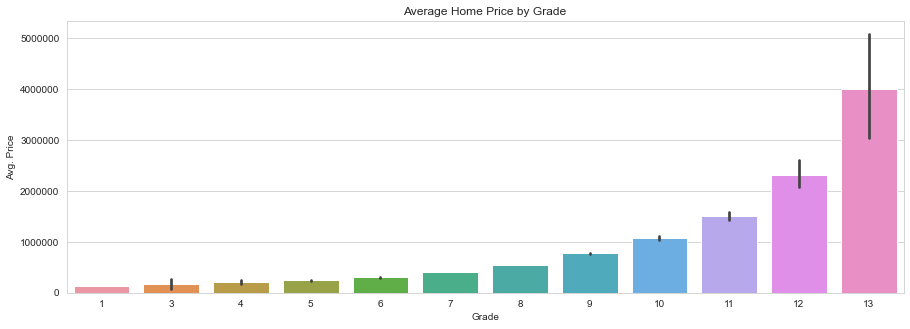

In [8]:
sns.set_style('whitegrid')
x = df_train['grade']
y = df_train['price']
fig, ax = plt.subplots(figsize = (15, 5))

ax = sns.barplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')

ax.set(xlabel='Grade', ylabel='Avg. Price')
plt.title("Average Home Price by Grade") # You can comment this line out if you don't need title

plt.show()

Conducting an ANOVA test to...

In [9]:
alpha = 0.05 

formula = 'price~C(grade)'
lm_condition = smf.ols(formula, df_train).fit()
anova_condition = sm.stats.anova_lm(lm_condition, typ=2)

if anova_condition["PR(>F)"][0] < alpha:
    print("The grade of a home has a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

The grade of a home has a statistically significant impact on average property value
Conditions F-statisic Probability:  0.0


**Visualising the Average Home Price by Number of Bathrooms**

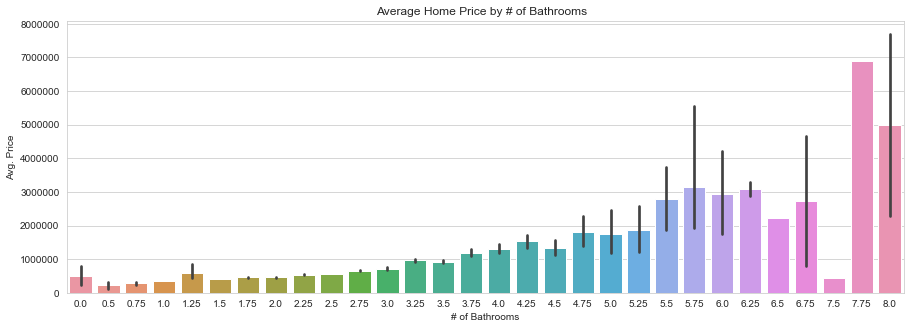

In [10]:
sns.set_style('whitegrid')
x = df_train['bathrooms']
y = df_train['price']
fig, ax = plt.subplots(figsize = (15, 5))

ax = sns.barplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')

ax.set(xlabel='# of Bathrooms', ylabel='Avg. Price')
plt.title("Average Home Price by # of Bathrooms  ") # You can comment this line out if you don't need title

plt.show()

Conducting an ANOVA Test to...

In [11]:
alpha = 0.05 
#ANOVA Test Setup
formula = 'price~C(bathrooms)'
lm_condition = smf.ols(formula, df_train).fit()
anova_condition = sm.stats.anova_lm(lm_condition, typ=2)

if anova_condition["PR(>F)"][0] < alpha:
    print("The amount of bathrooms has a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

The amount of bathrooms has a statistically significant impact on average property value
Conditions F-statisic Probability:  0.0


Since Zip Code had the lowest impact on Home Price, I...

In [12]:
mean_price_by_zip = df_train.groupby("zipcode")["price"].mean().sort_values(ascending = False)[:70]
count_by_zip = df_train.groupby("zipcode")["price"].count().sort_values(ascending = False)[:70]
mean_price_by_zip = mean_price_by_zip.to_frame()
mean_price_by_zip['count'] = count_by_zip
mean_price_by_zip = mean_price_by_zip.reset_index().reset_index()

In [13]:
mean_price_by_zip

,index,zipcode,price,count
0,0,98039,2.202790e+06,42
1,1,98004,1.396883e+06,237
2,2,98040,1.183018e+06,229
3,3,98112,1.119458e+06,216
4,4,98102,9.336715e+05,80
5,5,98109,8.759879e+05,85
6,6,98119,8.712724e+05,149
7,7,98105,8.687880e+05,170
8,8,98006,8.494588e+05,385
9,9,98005,8.088476e+05,140


In [14]:
# mean_price_by_zip = df_train.groupby("zipcode")["price"].mean().sort_values(ascending = False)[:70]

top5_zip_by_mean_price = df_train.groupby("zipcode")['price'].mean().sort_values(ascending = False)[:5]
total_mean_price = df_train.price.mean()

top5_zips_by_avg_number_of_bedrooms = df_train.groupby("zipcode")['bedrooms'].mean().sort_values(ascending = False)[:5]
total_mean_bedrooms = df_train.price.mean()

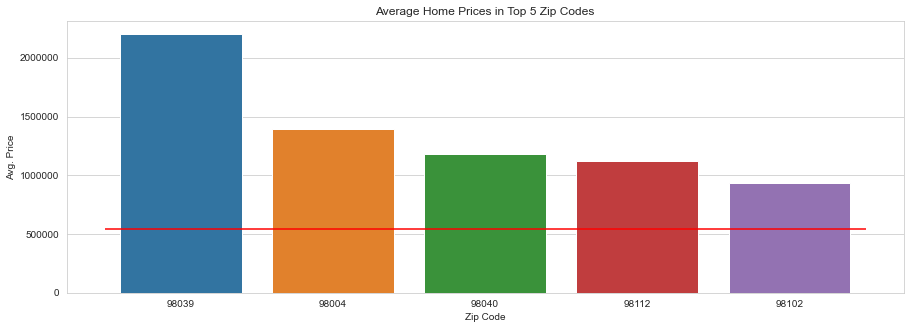

In [15]:
sns.set_style('whitegrid')
x = ['98039', '98004', '98040', '98112', '98102']
y = [2.202790e+06, 1.396883e+06, 1.183018e+06, 1.119458e+06, 9.336715e+05]
fig, ax = plt.subplots(figsize = (15, 5))
ax = sns.barplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')

ax.set(xlabel='Zip Code', ylabel='Avg. Price')
plt.title("Average Home Prices in Top 5 Zip Codes") # You can comment this line out if you don't need title
plt.hlines(total_mean_price, -.5 ,4.5, colors="red", label="Average Price")

plt.show()

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [16]:
df_train['bedrooms'].value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [17]:
mean_bedrooms = df_train['bedrooms'].mean()
print(mean_bedrooms)

3.3724696356275303


In [18]:
df_train['bedrooms'].replace(33, 3, inplace=True) # changing 33 bedroom house to 3

In [19]:
df_train['bedrooms'].value_counts()

3     7865
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
Name: bedrooms, dtype: int64

In [20]:
df_train['multi_floor'] = [0 if x == 1 else 1 for x in df_train.floors] 

In [21]:
df_train['multi_floor'].value_counts()

1    8684
0    8606
Name: multi_floor, dtype: int64

In [22]:
multi = df_train[(df_train["multi_floor"] > 0)]
multi_mean = multi.price.mean()

single = df_train[(df_train["multi_floor"] == 0)]
single_mean = single.price.mean()

print(multi_mean, single_mean)

637199.7944495624 443405.0407854985


Running an Independent T-Test to assess whether or not there is a statistically significant difference between the mean price of Multiple Floor Homes and Single Floor Homes. 

In [23]:
# t test of independence 
alpha = 0.05
multi_p_val = stats.ttest_ind(multi.price, single.price, equal_var=False)[1]
print("Multiple Floor vs. Single Floor T-test P Value: ", multi_p_val)
if multi_p_val < alpha:
    print("The P value is less than alpha, reject null-hypothesis")

Multiple Floor vs. Single Floor T-test P Value:  1.7862361783452734e-263
The P value is less than alpha, reject null-hypothesis


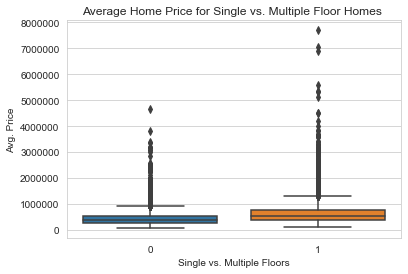

In [24]:
sns.set_style('whitegrid')

ax = sns.boxplot(x="multi_floor", y="price", data=df_train)

ax.ticklabel_format(style='plain', axis='y')

ax.set(xlabel='Single vs. Multiple Floors', ylabel='Avg. Price')
plt.title("Average Home Price for Single vs. Multiple Floor Homes ") # You can comment this line out if you don't need title

plt.show()

In [25]:
df_train['has_basement'] = [0 if x == 0 else 1 for x in df_train.sqft_basement]

In [26]:
df_train['has_basement'].value_counts()

0    10484
1     6806
Name: has_basement, dtype: int64

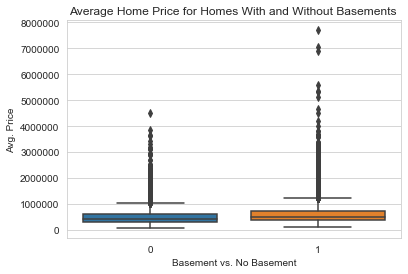

In [27]:
sns.set_style('whitegrid')

ax = sns.boxplot(x="has_basement", y="price", data=df_train)

ax.ticklabel_format(style='plain', axis='y')

ax.set(xlabel='Basement vs. No Basement', ylabel='Avg. Price')
plt.title("Average Home Price for Homes With and Without Basements ") # You can comment this line out if you don't need title

plt.show()

In [28]:
zip_rank = dict(zip(mean_price_by_zip['zipcode'],mean_price_by_zip['index']))
zip_rank

{98039: 0,
 98004: 1,
 98040: 2,
 98112: 3,
 98102: 4,
 98109: 5,
 98119: 6,
 98105: 7,
 98006: 8,
 98005: 9,
 98033: 10,
 98075: 11,
 98199: 12,
 98074: 13,
 98053: 14,
 98077: 15,
 98177: 16,
 98052: 17,
 98008: 18,
 98144: 19,
 98122: 20,
 98029: 21,
 98116: 22,
 98115: 23,
 98027: 24,
 98007: 25,
 98024: 26,
 98103: 27,
 98107: 28,
 98117: 29,
 98072: 30,
 98136: 31,
 98065: 32,
 98034: 33,
 98070: 34,
 98059: 35,
 98011: 36,
 98166: 37,
 98125: 38,
 98028: 39,
 98014: 40,
 98045: 41,
 98019: 42,
 98126: 43,
 98010: 44,
 98056: 45,
 98155: 46,
 98118: 47,
 98133: 48,
 98038: 49,
 98146: 50,
 98108: 51,
 98058: 52,
 98092: 53,
 98106: 54,
 98178: 55,
 98042: 56,
 98022: 57,
 98055: 58,
 98198: 59,
 98031: 60,
 98030: 61,
 98003: 62,
 98023: 63,
 98188: 64,
 98001: 65,
 98148: 66,
 98032: 67,
 98168: 68,
 98002: 69}

In [29]:
df_train['zip_by_price'] = df_train['zipcode']
df_train['zip_by_price'].replace(zip_rank, inplace = True)

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [30]:
#Use grade and sqft_living because they are the two biggest predictors per standard deviation

In [31]:
df_train['grade_sqft_living'] = (df_train.grade**2) * df_train.sqft_living

In [32]:
df_train['grade_sqft_above'] = (df_train.grade**2) * df_train.sqft_above

In [33]:
df_train['grade_sqft_living15'] = (df_train.grade**2) * df_train.sqft_living15

In [34]:
df_train['grade_bathrooms'] = (df_train.grade**2) * df_train.bathrooms

### 4.1) Identify a categorical variable in the data set and create dummy columns.


FIX THIS BEFORE UPLOADING TO GITHUB

Creating a dummy variable for Zip Code in order for our model to be able to evaluate home prices relative to the Zip Code that defines them. 


In [35]:
dummy_zip = pd.get_dummies(df_train.zipcode)
zip_merge = pd.concat([df_train,dummy_zip], axis='columns')
df_train = zip_merge.drop(columns=['zipcode', 98103]) # dropping zip code 98103

In [36]:
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,multi_floor,has_basement,zip_by_price,grade_sqft_living,grade_sqft_above,grade_sqft_living15,grade_bathrooms,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,1,0,52,132480,132480,152960,144.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,0,1,23,185600,117120,151680,192.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,1,0,8,456170,456170,448910,302.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,1,0,33,656640,656640,583200,504.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,1,0,17,206550,206550,182250,202.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
df_train.shape

(17290, 95)

In [38]:
df_train.grade.value_counts()

7     7183
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

In [39]:
dummy_grade = pd.get_dummies(df_train.grade)
grade_merge = pd.concat([df_train,dummy_grade],axis='columns')
df_train = grade_merge.drop(columns=['grade',13])

In [40]:
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,multi_floor,has_basement,zip_by_price,grade_sqft_living,grade_sqft_above,grade_sqft_living15,grade_bathrooms,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,...,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,1,3,4,5,6,7,8,9,10,11,12
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,2070,0,1986,0,47.4388,-122.162,2390,7700,1,0,52,132480,132480,152960,144.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,1830,1070,1977,0,47.6784,-122.285,2370,6283,0,1,23,185600,117120,151680,192.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,3770,0,1997,0,47.5646,-122.129,3710,9685,1,0,8,456170,456170,448910,302.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,4560,0,1990,0,47.6995,-122.228,4050,14226,1,0,33,656640,656640,583200,504.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,2550,0,2004,0,47.6647,-122.083,2250,4050,1,0,17,206550,206550,182250,202.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

Adding 2 new columns to our data frame, 'sale_year' and 'month_sold', which were derived from the 'date' column in our initial data set. 

In [41]:
df_train['yr_sold'] = pd.DatetimeIndex(df_train['date']).year

In [42]:
df_train['month_sold'] = pd.DatetimeIndex(df_train['date']).month

In [43]:
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,multi_floor,has_basement,zip_by_price,grade_sqft_living,grade_sqft_above,grade_sqft_living15,grade_bathrooms,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,...,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,1,3,4,5,6,7,8,9,10,11,12,yr_sold,month_sold
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,2070,0,1986,0,47.4388,-122.162,2390,7700,1,0,52,132480,132480,152960,144.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2014,10
7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,1830,1070,1977,0,47.6784,-122.285,2370,6283,0,1,23,185600,117120,151680,192.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2014,8
7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,3770,0,1997,0,47.5646,-122.129,3710,9685,1,0,8,456170,456170,448910,302.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2014,8
9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,4560,0,1990,0,47.6995,-122.228,4050,14226,1,0,33,656640,656640,583200,504.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2015,3
9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,2550,0,2004,0,47.6647,-122.083,2250,4050,1,0,17,206550,206550,182250,202.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2014,7


In [44]:
df_train['month_sold'].value_counts()

5     1928
4     1804
7     1761
6     1753
8     1561
3     1496
10    1493
9     1388
12    1170
11    1154
2      990
1      792
Name: month_sold, dtype: int64

In [45]:
df_train['month_sold'].unique()

array([10,  8,  3,  7,  5,  4,  1,  6,  2,  9, 11, 12])

In [46]:
df_train['yr_sold'].value_counts()

2014    11703
2015     5587
Name: yr_sold, dtype: int64

In [47]:
df_train['yr_sold'].value_counts()

2014    11703
2015     5587
Name: yr_sold, dtype: int64

In [48]:
df_train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,multi_floor,has_basement,zip_by_price,grade_sqft_living,grade_sqft_above,grade_sqft_living15,grade_bathrooms,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,...,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,1,3,4,5,6,7,8,9,10,11,12,yr_sold,month_sold
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,1.729000e+04,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.00000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.407395e+05,3.370735,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,1789.306015,292.158589,1970.792019,83.806304,47.560058,-122.214258,1987.986698,12873.475824,0.502256,0.393638,34.598670,1.384719e+05,1.195532e+05,1.287224e+05,136.345489,0.016426,0.00908,0.012955,0.013707,0.008097,0.022267,0.007056,0.013071,0.004280,0.009427,0.005842,0.008386,0.010931,0.023713,0.003759,0.019202,0.012666,0.014459,0.011625,0.012435,0.005957,0.020532,0.025159,0.026316,0.002429,0.013245,...,0.022267,0.021573,0.014401,0.005726,0.012435,0.020706,0.016541,0.009370,0.016541,0.004627,0.009832,0.015385,0.012261,0.008733,0.004916,0.012493,0.026894,0.015385,0.025275,0.023713,0.008618,0.013592,0.018566,0.016079,0.023135,0.012377,0.015558,0.014228,0.002487,0.020243,0.012088,0.012435,0.012608,0.012435,0.006304,0.012724,0.015385,0.000058,0.000116,0.001272,0.011105,0.095315,0.415442,0.280393,0.121400,0.051648,0.018450,0.004164,2014.323135,6.570561
std,3.733190e+05,0.911923,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,829.265107,443.151874,29.343516,400.329376,0.138412,0.140857,684.802635,27227.437583,0.500009,0.488570,18.928618,1.149709e+05,1.013831e+05,8.883450e+04,90.719921,0.127109,0.09486,0.113086,0.116277,0.089622,0.147556,0.083706,0.113583,0.065283,0.096639,0.076209,0.091195,0.103982,0.152158,0.061200,0.137238,0.111833,0.119377,0.107195,0.110820,0.076955,0.141816,0.156613,0.160077,0.049228,0.114324,...,0.147556,0.145289,0.119142,0.075455,0.110820,0.142401,0.127549,0.096345,0.127549,0.067866,0.098672,0.123080,0.110054,0.093046,0.069945,0.111074,0.161779,0.123080,0.156963,0.152158,0.092433,0.115792,0.134989,0.125782,0.150336,0.110565,0.123762,0.118432,0.049809,0.140834,0.109282,0.110820,0.111580,0.110820,0.079151,0.112085,0.123080,0.007605,0.010755,0.035649,0.104795,0.293658,0.492812,0.449204,0.326601,0.221322,0.134576,0.064398,0.467687,3.116999
min,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000

In [49]:
zip_rank = dict(zip(mean_price_by_zip['zipcode'],mean_price_by_zip['index']))

In [50]:
df_train['zip_by_price'].replace(zip_rank, inplace = True)

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [51]:
#your code here 

# Turn year build into dummy categories in order to perform some interaction. 

yr_built_dummy = pd.get_dummies(df_train.yr_built)
df_train = pd.concat([df_train,yr_built_dummy],axis='columns')
# df_train = merged.drop(columns=['yr_built',1951])


In [52]:
#your code here 


#Changing renovated into a yes or no question to be used as multiplier for sqft_living

df_train['renovated'] = df_train.yr_renovated
df_train.renovated = df_train.renovated.apply(lambda x: 2 if x != 0 else 1)
df_train['multiplier'] = ((df_train.renovated) * df_train.sqft_living)

In [53]:
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,multi_floor,has_basement,zip_by_price,grade_sqft_living,grade_sqft_above,grade_sqft_living15,grade_bathrooms,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,...,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,renovated,multiplier
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,2070,0,1986,0,47.4388,-122.162,2390,7700,1,0,52,132480,132480,152960,144.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2070
7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,1830,1070,1977,0,47.6784,-122.285,2370,6283,0,1,23,185600,117120,151680,192.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2900
7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,3770,0,1997,0,47.5646,-122.129,3710,9685,1,0,8,456170,456170,448910,302.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3770
9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,4560,0,1990,0,47.6995,-122.228,4050,14226,1,0,33,656640,656640,583200,504.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4560
9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,2550,0,2004,0,47.6647,-122.083,2250,4050,1,0,17,206550,206550,182250,202.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2550


### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [54]:
# your code here




### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [55]:
# your code here




## Step 5: Model Evaluation



## 5.1)  Fit an initial model and check the errors to see if the model assumptions are being met. If need be, go back to steps 3 and 4 to improve your model. 

In [56]:
# create df called df_features, drop the dummy columns, 

In [57]:
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,multi_floor,has_basement,zip_by_price,grade_sqft_living,grade_sqft_above,grade_sqft_living15,grade_bathrooms,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,...,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,renovated,multiplier
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,2070,0,1986,0,47.4388,-122.162,2390,7700,1,0,52,132480,132480,152960,144.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2070
7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,1830,1070,1977,0,47.6784,-122.285,2370,6283,0,1,23,185600,117120,151680,192.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2900
7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,3770,0,1997,0,47.5646,-122.129,3710,9685,1,0,8,456170,456170,448910,302.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3770
9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,4560,0,1990,0,47.6995,-122.228,4050,14226,1,0,33,656640,656640,583200,504.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4560
9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,2550,0,2004,0,47.6647,-122.083,2250,4050,1,0,17,206550,206550,182250,202.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2550


In [58]:
#your code here 


lr_model = ols(formula='price~zip_by_price+sqft_living+waterfront+view+yr_built', data=df_train).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     8586.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:23:02   Log-Likelihood:            -2.3558e+05
No. Observations:               17290   AIC:                         4.712e+05
Df Residuals:                   17284   BIC:                         4.712e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      2.86e+06   1.09e+05     26.348      0.000    2.65e+06    3.07e+06
zip_by_price -7688.4715     84.487    -91.002      0.000   -7854.075   -7522.868
sqft_living    233.6397      1.923    121.527      0.000     229.871     237.408
waterfront    6.366e+05   1.87e+04     33.992      0.000       6e+05    6.73e+05
view          6.143e+04   2250.253     27.298      0.000     5.7e+04    6.58e+04
yr_built     -1298.3853     55.921    -23.218      0.000   -1407.996   -1188.774
==============================================================================
Omnibus:                    16349.636   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2227891.762
Skew:                           4.166   Prob(JB):                         0.00
Kurtosis:                      57.983   Cond. No.                     2.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5.2) Perform a train-test split of the data.

In [59]:
#your code here 
# dropping the columns we don't want to use for our model. 
# only drop dummies here. 

df_features = df_train.drop(['date', 'price'], axis=1)

In [60]:
df_features.shape

(17290, 223)

In [61]:
target = df_train['price']

In [62]:
# linear regression object
lm = LinearRegression()

# fitting it to the data
lm = lm.fit(df_features, target)

# access output
print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm.score(df_features, target))


87562942571.04865
[-3.47292614e+03 -1.27585865e+04 -1.33134165e+12  1.98256569e-01
 -3.12828987e+04  6.32596862e+05  4.63624728e+04  3.85446849e+04
  1.33134165e+12  1.33134165e+12 -4.47848312e+07  2.33729492e+03
  2.43187345e+05 -2.19947846e+05  5.59544678e+01 -1.67846680e-02
  2.47541188e+03  1.44419394e+04 -2.46722080e+05  2.79370117e+00
 -1.15844727e+00 -3.54309082e-01  5.67823456e+02  9.14199284e+06
  1.01433339e+07  8.37733680e+06 -5.95074343e+06 -4.42241961e+06
 -4.70887535e+06 -5.15392191e+05 -2.23261215e+06  4.06926240e+06
  2.03432553e+06  3.07563137e+06  3.52262983e+06  7.23664730e+06
  8.59542045e+06 -3.08074906e+05 -8.15870548e+05  2.75931151e+06
 -1.49783459e+06  8.15478781e+06  7.91216545e+06  9.61798919e+06
 -4.15109520e+06  1.36250114e+06  5.26000988e+06 -5.80174900e+06
 -5.98578432e+06  6.94140625e+06  3.38695759e+06 -2.51569482e+06
 -3.27576404e+06  7.43504745e+06  4.26576079e+06  5.96211717e+06
  1.79967794e+06  1.12673318e+06  1.43921650e+06  5.89719656e+05
 -3.530

**Create Train and Test Split**


In [63]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=3,test_size=0.2)

In [64]:
#check the shape of the results
print("Training set - features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - features: ", X_test.shape, "Target: ",y_test.shape)

Training set - features:  (13832, 223) Target:  (13832,)
Training set - features:  (3458, 223) Target:  (3458,)


**How well did the model perform?**


In [65]:
print ("R^2 Score:", lm.score(X_train, y_train))

R^2 Score: 0.8528043309515096


In [66]:
# predict on the training data
y_train_pred = lm.predict(X_train)

In [67]:
y_train_pred

array([355883.50686646, 664347.13525391, 675765.91976929, ...,
       504874.70152283, 320323.94265747, 384072.28555298])

In [68]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 84305.36864146999
Mean Squared Error: 20526215140.97831
Root Mean Squared Error: 143269.72862743304


**Predicting the Test Set**

In [69]:
#predict on the test set of data
y_pred = lm.predict(X_test)

In [70]:
y_pred

array([ 562680.51576233,  606247.5748291 , 1036586.62268066, ...,
        182743.9683075 ,  836833.13070679,  295854.68708801])

In [71]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.8498800303157208


In [72]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:83842.51840245703
Mean Squared Error:20865721264.883324
Root Mean Squared Error:144449.71881206043


**Comparing our Model's performance on training data versus data**

In [73]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  143269 vs. Testing:  144449


**Check the assumptions of linear regression**

In [74]:
#create a data array of our errors/residuals
residuals = (y_test- y_pred)

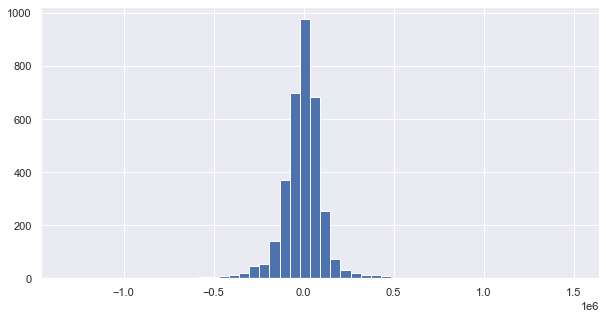

In [88]:
sns.set_theme(style="darkgrid")
residuals.hist(bins=50, figsize=(10,5))
plt.show()

<AxesSubplot:xlabel='price', ylabel='price'>

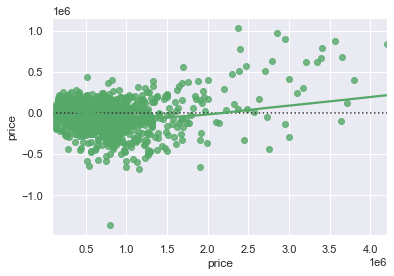

In [76]:
sns.residplot(y_test, residuals, lowess=True, color="g")

In [77]:
import pickle

pickle_out = open("model.pickle","wb")

pickle.dump(lm, pickle_out)

pickle_out.close()

### 5.3) Fit the model to the training data.

In [78]:
#your code here

### 5.4) Use the model to predict on the training set and the test set.

In [79]:
#your code here 

### 5.5) Evaluate the training and test predictions using RMSE.

In [80]:
#your code here 

### 5.6) Determine if your model is overfit.

In [81]:
#your code here 

In [82]:
def test_data(df_features, target):
    testtrainsplit
    lm = LinearRegression()
    lm.fit()
    return RMSE

In [83]:
df1_rmse = test_data(df_train)

TypeError: test_data() missing 1 required positional argument: 'target'

In [ ]:
df_train.head()

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models. You will have to repeat steps 5.3 through 5.6 to determine how your new model is performing. 

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [ ]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [ ]:
# your code here

## Step 7: Compare the RMSE of your different models that use differen features and determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [ ]:
# lm_final = lm.fit(df[selected_rfe], df['price'])

In [ ]:
# df[df_features]